# **Travel Insurance Prediction**

By: DataGigs Team, consisting of:
- Devina
- Hani Kurnia
- Yudanta A
- Mutiara Farianda
- Linda
- Rudiyanti

# **Libraries**

In [1]:
import numpy as np # For number operations
import pandas as pd # For DataFrames
import matplotlib.pyplot as plt # For Plotting
import seaborn as sns # For Plotting
import matplotlib.style as style # To add styles to plot
from textwrap import wrap # To enable text wrap for visualization using graphs
import warnings # Importing warning
warnings.filterwarnings('ignore') # To ignore unsignificant warning

from scipy.stats import chi2_contingency # To check the correlation of all categorical features
from sklearn.preprocessing import MinMaxScaler # To normalize the data
from sklearn.preprocessing import LabelEncoder # To encode the values
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve # To split the data into train and test data
from sklearn.metrics import make_scorer, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss, confusion_matrix # For the scoring reports
from sklearn.model_selection import cross_validate # For cross validation evalution
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier # Importing kNN Classifier
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Importing Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier # Importing AdaBoost Classifier
from xgboost import XGBClassifier # Importing XGBoost Classifier

In [2]:
# # Importing Functions
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.style as style
# import warnings
# warnings.filterwarnings('ignore')

# **1. Exploratory Data Analysis**

## **1.1 Descriptive Statistics**
Memahami data yang dimiliki.

### Loading Dataset

In [3]:
# Loading Dataset

df = pd.read_csv("TravelInsurancePrediction.csv")
df = df.drop(labels='Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [4]:
# Checking the dataset
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [5]:
# Checking the Descriptive Statistics

df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Informasi Data

*   Terdapat 9 kolom kolom data setelah membuang kolom index yang berjudul 'Unnamed: 0'
*   Terdapat 1987 baris data
*   Terdapat 2 jenis tipe data, yaitu int64 dan object
*   Tidak terdapat baris data dengan nilai yang hilang atau null

### Missing Values

In [6]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak terdapat kolom dengan nilai null, semua data terisi dengan lengkap.

### Numerical and Categorical Data

In [7]:
nums = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
cats = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [8]:
# Checking the Descriptive Statistics of numerical features

df[nums].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


#### Statistical Summary (Numerical)

Age:
- Mean (29.650226) > Median (29.000000), tidak berbeda jauh
- Min (25.000000) dan Max (35.000000) tidak jauh

Annual Income:
- Mean (9.327630e+05) > Median (9.000000e+05), tidak berbeda jauh
- Min (3.000000e+05) dan Max (1.800000e+06) cukup jauh sehingga menandakan adanya kemungkinan terdapat outliers. Perlu dilakukan analisa lebih lanjut sebelum melanjutkan ke tahap pemodelan menggunakan machine learning.

Family Members:
- Mean (4.752894) dan Median (5.000000) tidak timpang
- Min (2.000000) dan Max (9.000000) tidak jauh

Chronic Diseases:
- Mean (0.277806) > Median (0.000000), tidak berbeda jauh
- Min (0.000000) dan Max (1.000000) tidak jauh

Travel Insurance:
- Mean (0.357323) > Median (0.000000), tidak berbeda jauh
- Min (0.000000) dan Max (1.000000) tidak jauh

In [9]:
# Checking the Descriptive Statistics of Categorical Features

df[cats].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


#### Statistical Summary (Categorical)

Jumlah data unik pada fitur-fitur kategorikal hanya 2, sehingga tidak perlu dilakukan encoding pada tahap preprocessing.

## **1.2 Univariate Analysis**

### Distribution of Each Feature with The Target 

In [10]:
# Checking the value counts of each columns

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64



#### Age

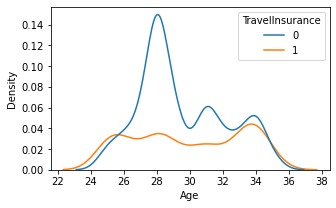

In [11]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x="Age", hue="TravelInsurance")
plt.show()

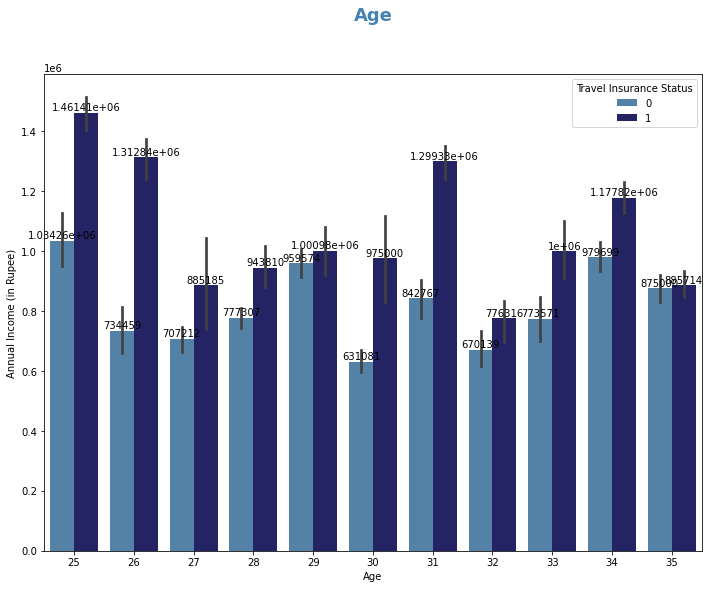

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df, x="Age", y= "AnnualIncome", hue="TravelInsurance", palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Age", color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("Age")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan kepadatan di atas bahwa rata-rata pembeli Travel Insurance pada usia >32 dan <36 tahun, dan yang tidak membeli asuransi perjalanan rata-rata di usia 24 s/d 30 tahun.

#### Employment Type

<Figure size 360x216 with 0 Axes>

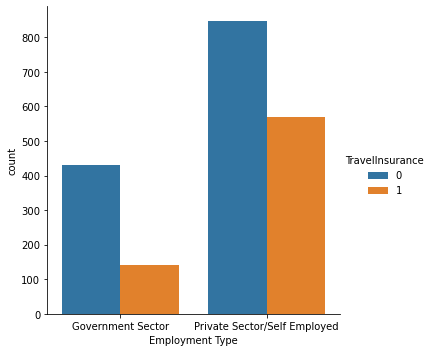

In [13]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="Employment Type",kind='count',hue="TravelInsurance")
plt.show()

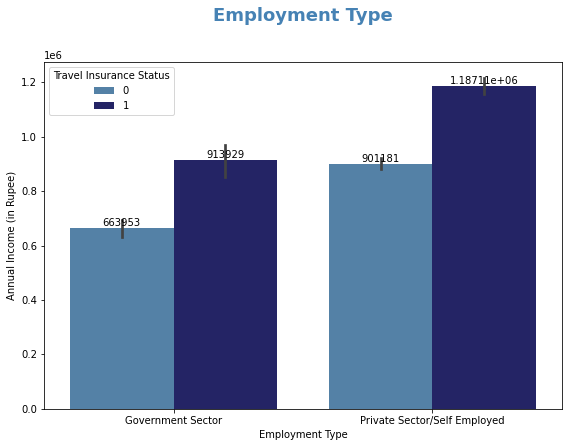

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x="Employment Type", y= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Employment Type",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("Employment Type")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [15]:
print(ax.containers[0])

<BarContainer object of 2 artists>


Berdasarkan jenis pekerjaan, yang cenderung membeli asuransi perjalanan adalah karyawan swasta.

#### Graduate Or Not

<Figure size 360x216 with 0 Axes>

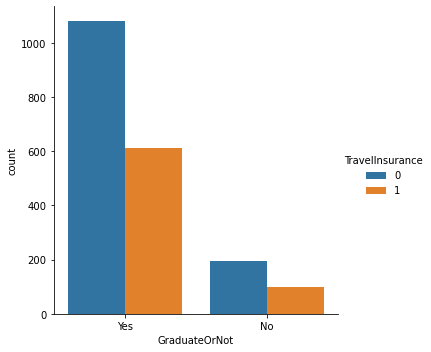

In [16]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="GraduateOrNot",kind='count',hue="TravelInsurance")
plt.show()

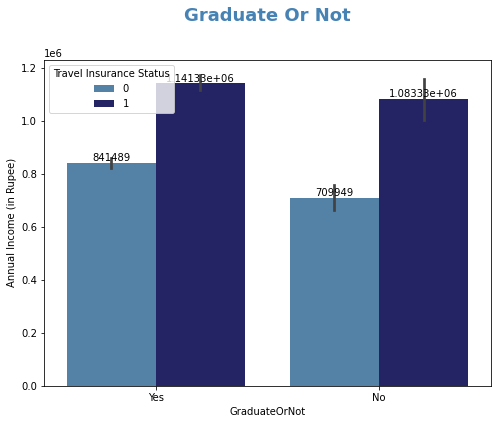

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x="GraduateOrNot", y= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Graduate Or Not",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("GraduateOrNot")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.show()

Berdasarkan perspektif lulus pendidikan atau tidak, orang yang lulus pendidikan memiliki preferensi untuk memiliki asuransi perjalanan.

#### Annual Income

<Figure size 360x216 with 0 Axes>

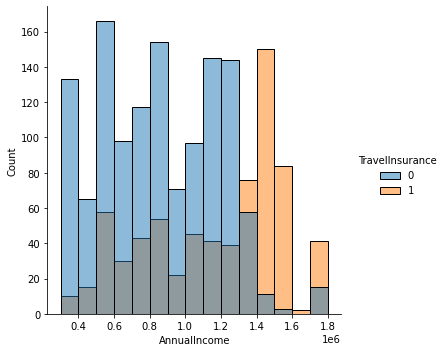

In [18]:
plt.figure(figsize=(5,3))
sns.displot(data=df, x="AnnualIncome", hue="TravelInsurance")
plt.show()

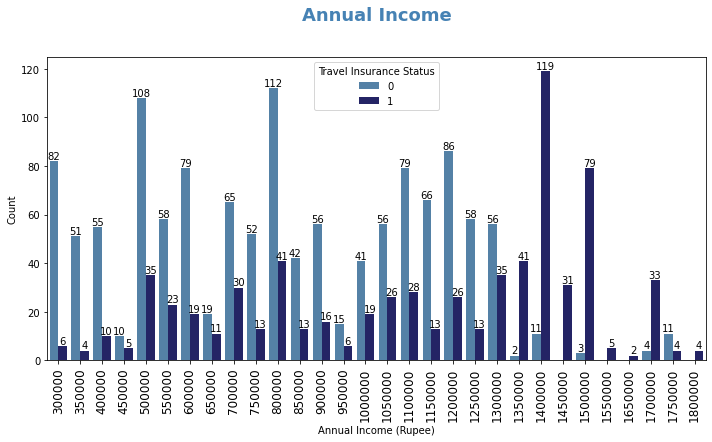

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Annual Income",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("Annual Income (Rupee)")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=12)
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

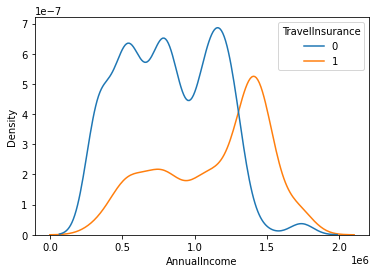

In [20]:
sns.kdeplot(data=df, x="AnnualIncome",hue="TravelInsurance")
plt.show()

Berdasarkan fitur penghasilan tahunan, yang memiliki kecenderungan untuk membeli asuransi perjalanan adalah customer dengan penghasilan <1,3 Juta.

Saran Untuk Pre Processing: Pengelompokan golongan menggunakan binning.

#### FamilyMembers

<Figure size 360x216 with 0 Axes>

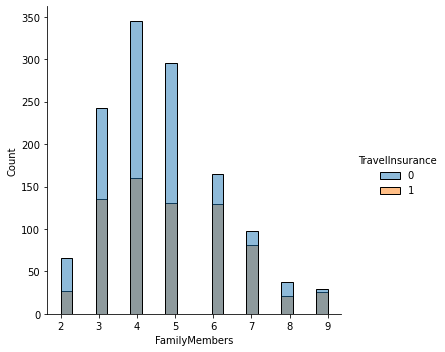

In [21]:
plt.figure(figsize=(5,3))
sns.displot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.show()

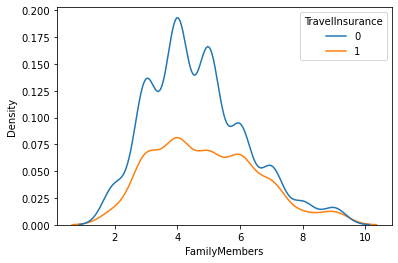

In [22]:
sns.kdeplot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.show()

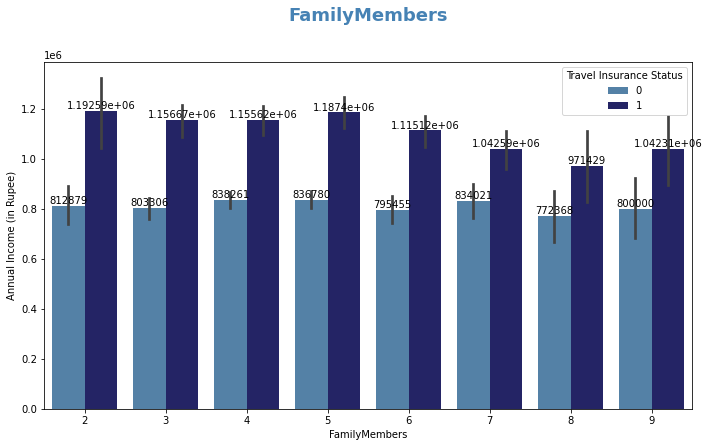

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x="FamilyMembers", y= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("FamilyMembers",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("FamilyMembers")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan fitur jumlah anggota keluarga, customer yang memiliki kecenderungan untuk membeli asuransi perjalanan memiliki 3-7 anggota keluarga.

#### Chronic Diseases

<Figure size 360x216 with 0 Axes>

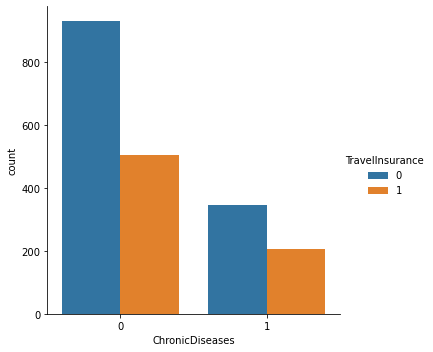

In [24]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="ChronicDiseases",kind='count',hue="TravelInsurance")
plt.show()

Berdasarkan fitur penyakit kronis, terlihat bahwa orang yang memiliki penyakit kronis cenderung tidak membeli asuransi perjalanan.

#### Frequent Flyer

<Figure size 360x216 with 0 Axes>

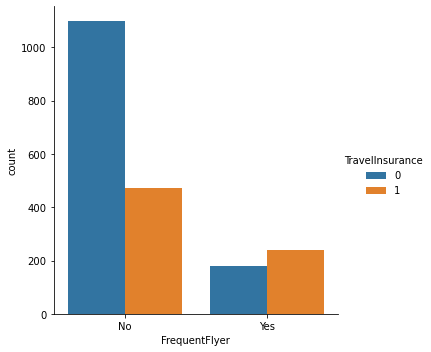

In [25]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="FrequentFlyer",kind='count',hue="TravelInsurance")
plt.show()

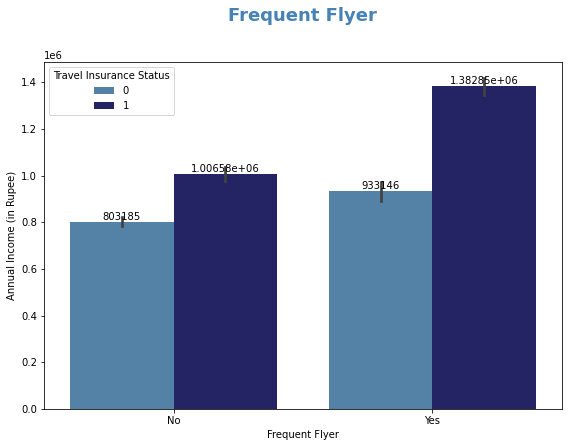

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x="FrequentFlyer", y= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Frequent Flyer",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("Frequent Flyer")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan fitur frekuensi perjalanan, customer yang sering melakukan perjalanan memiliki kecenderungan untuk membeli asuransi perjalanan.

#### Ever Travelled Abroad

<Figure size 360x216 with 0 Axes>

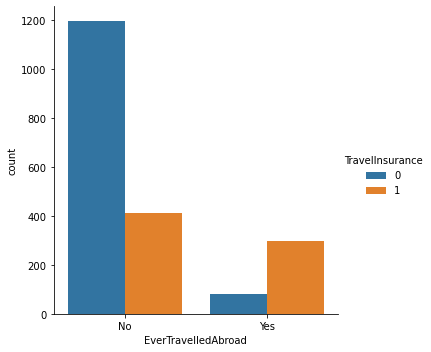

In [27]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="EverTravelledAbroad",kind='count',hue="TravelInsurance")
plt.show()

Customer yang pernah melakukan perjalanan internasional memiliki kemungkinan akan membeli asuransi perjalanan.

#### Target Plot

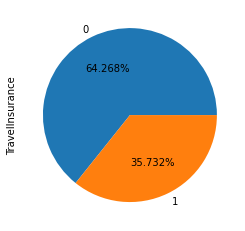

In [28]:
df.TravelInsurance.value_counts().plot(x=None, y=None, kind='pie',autopct='%1.3f%%')
plt.show()

Distribusi pada target tidak merata karena customer yang membeli asuransi perjalanan dan tidak memiliki perbedaan, hal tersebut dapat mempengaruhi pembuatan model.

### CountPlot: Numerical

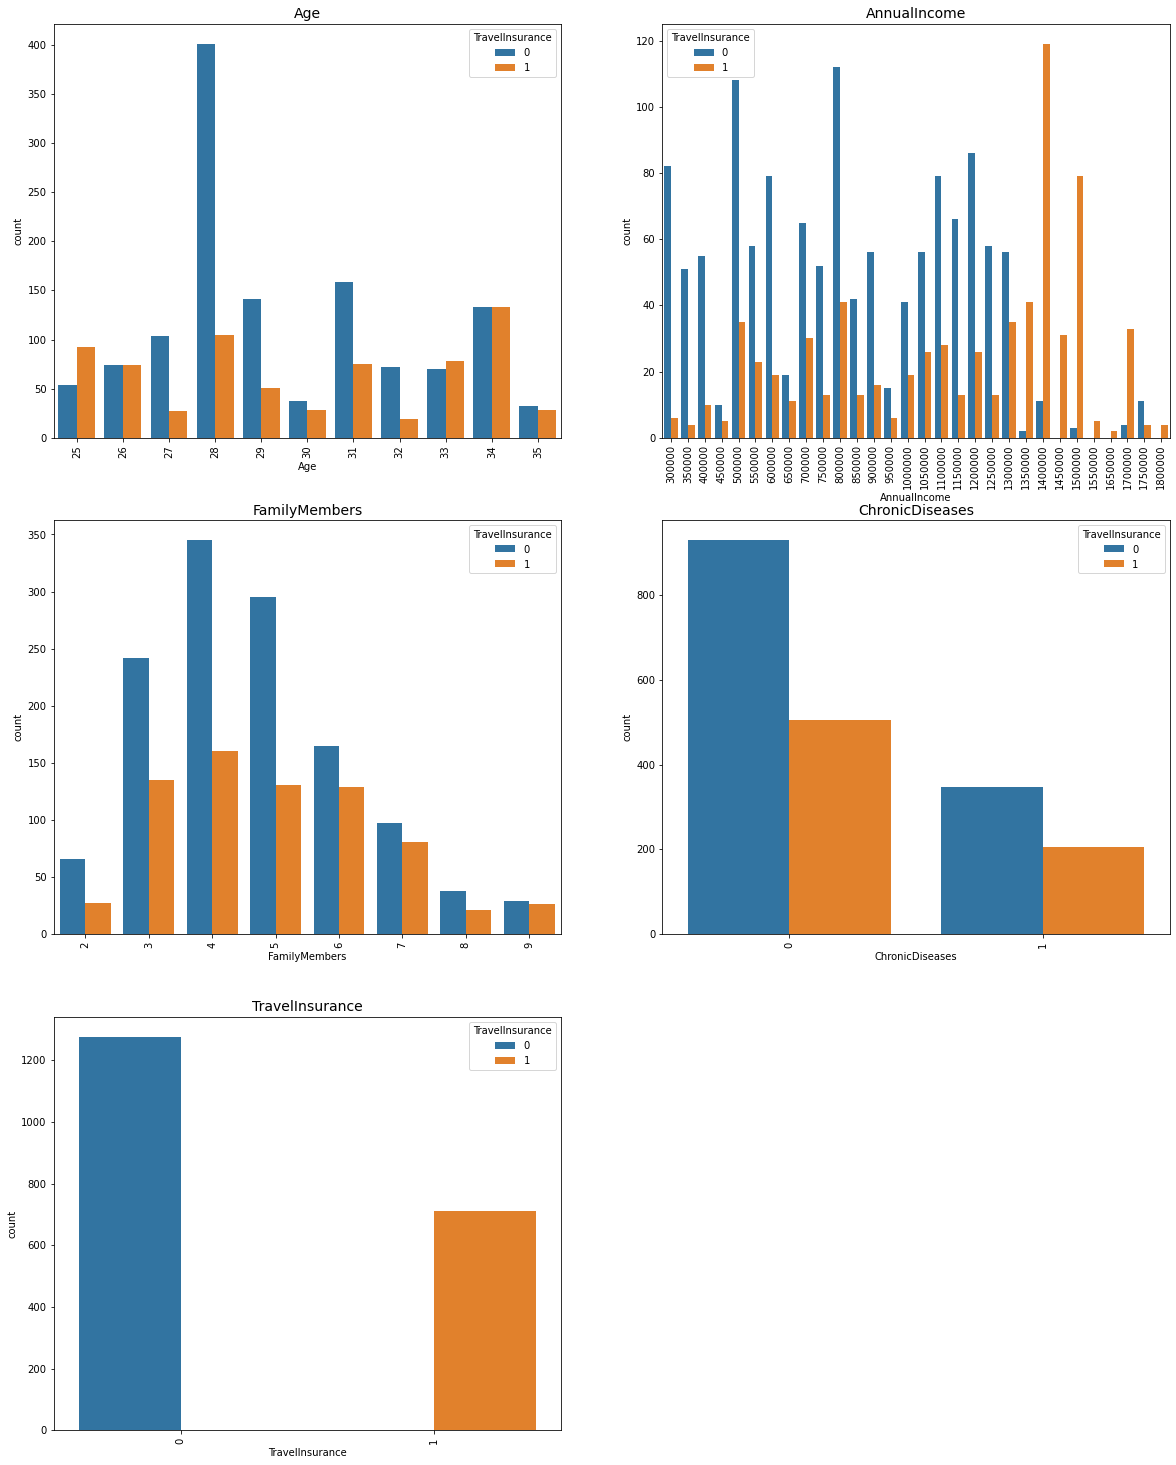

In [29]:
plt.figure(figsize=(20,35))
i = 1
for col in nums:
    plt.subplot(4,2,i)
    sns.countplot(x = col, data = df, hue = 'TravelInsurance')
    plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

### BoxPlot: Numerical

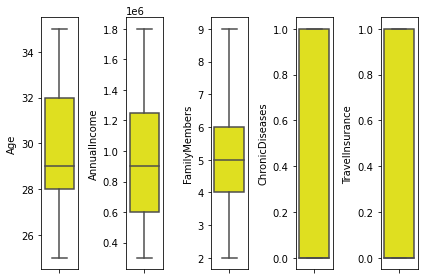

In [30]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

### Distplot: Numerical

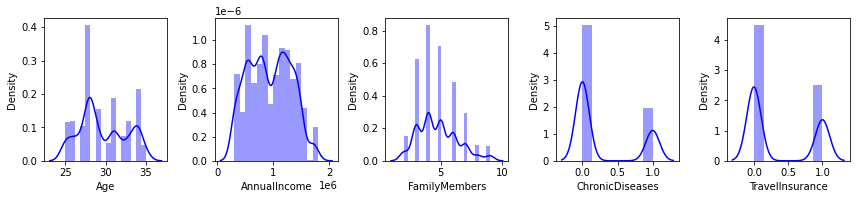

In [31]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

### ViolinPlot: Numerical

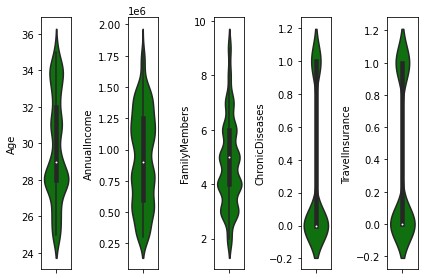

In [32]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### CountPlot: Categorical

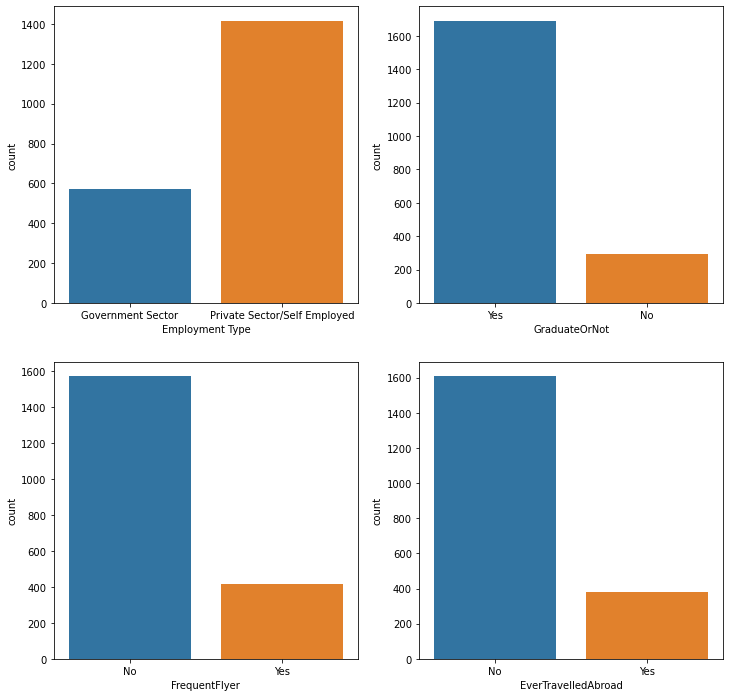

In [33]:
plt.figure(figsize=(12, 12))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cats[i]], orient='h')

## **1.3 Multivariate Analysis**

### Correlation and The Heatmap

In [34]:
df.corr() # Checking the correlation of Numerical Features

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


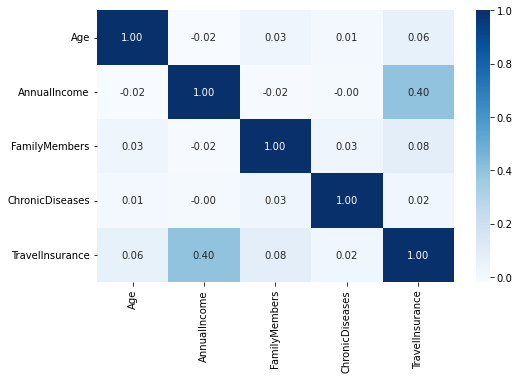

In [35]:
plt.figure(figsize=(8, 5)) # Generating the Correlation] Heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### PairPlot

<Figure size 2160x2160 with 0 Axes>

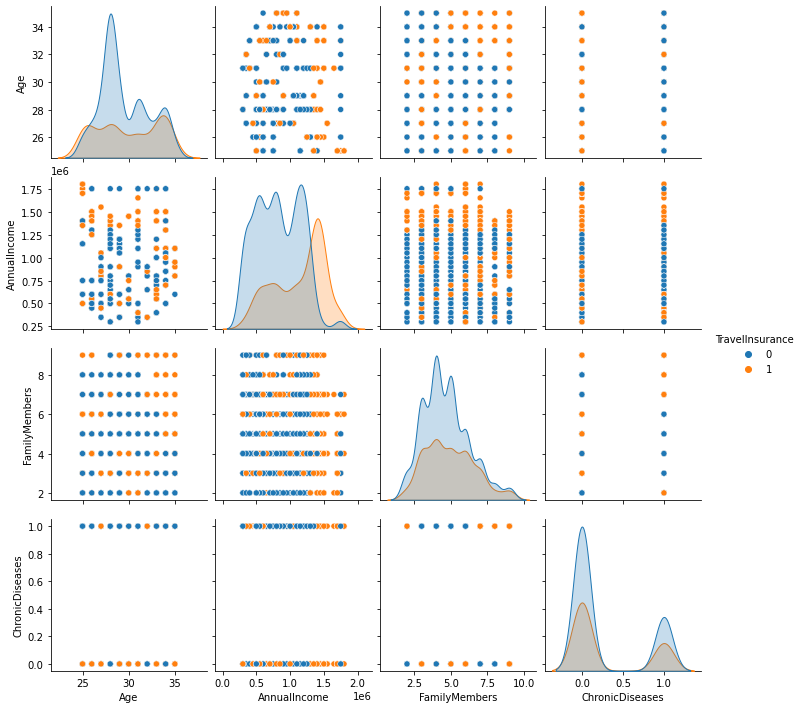

In [36]:
plt.figure(figsize=(30, 30)) # Generating Pair Plot of Numerical Features
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance')
plt.show()

### Distribution of Each Features vs Employment Type

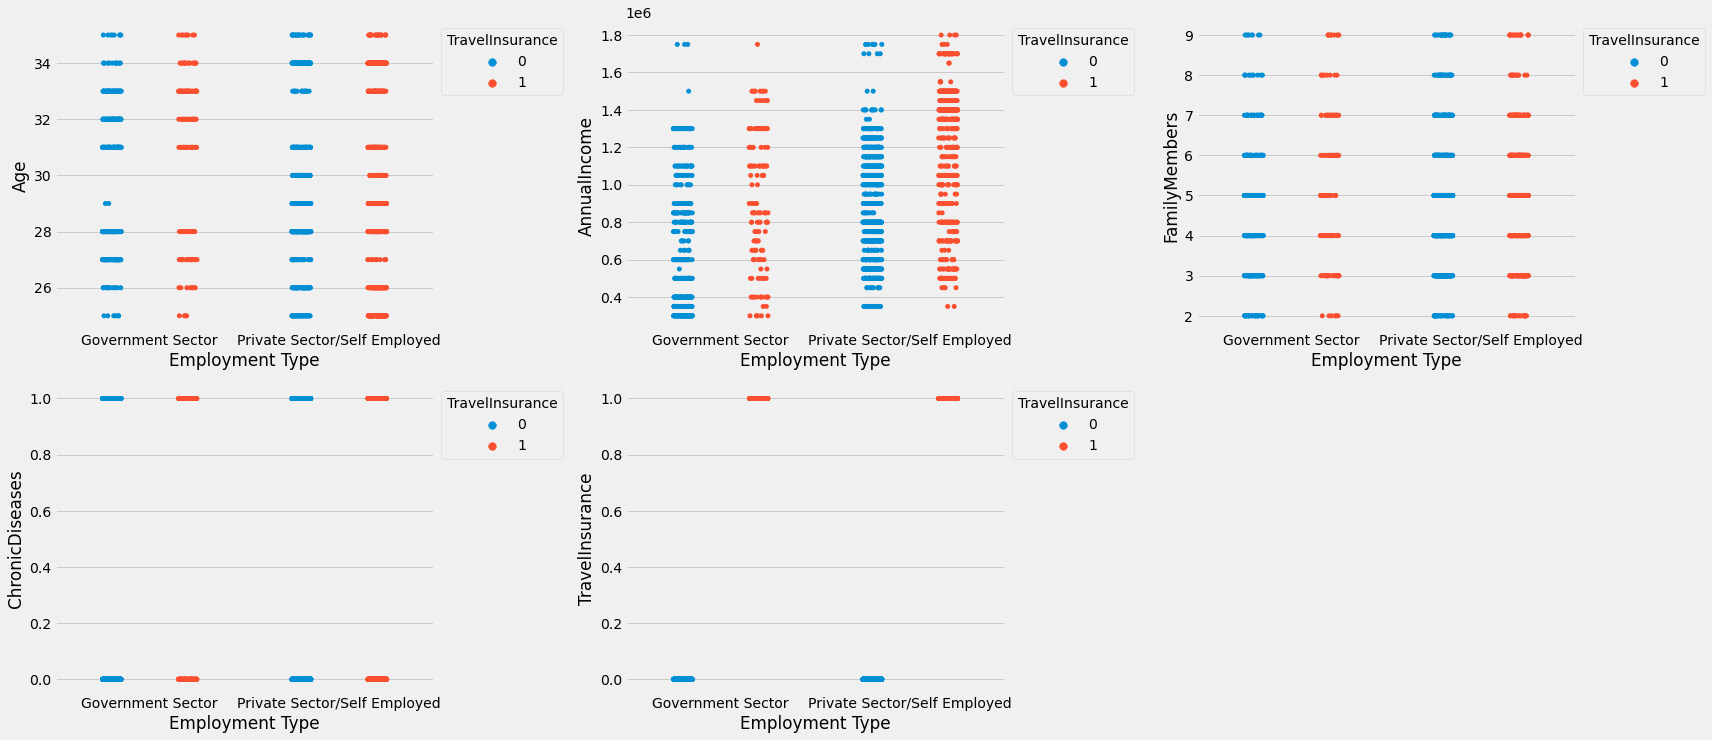

In [37]:
# Distribution of each features vs Employment Type

style.use('fivethirtyeight')
fig = plt.figure(figsize=(24, 15))
for i in range(0, len(nums)): # For Every numerical features
    ax = fig.add_subplot(3, 3, i+1) # Setting the CatPlots' / StripPlots' layout positions
    sns.stripplot(ax=ax, data=df, x='Employment Type', y=nums[i], hue='TravelInsurance', dodge=True) # Fraw the CatPlots / StripPlots
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

### Distribution of Each Features vs. GraduateOrNot

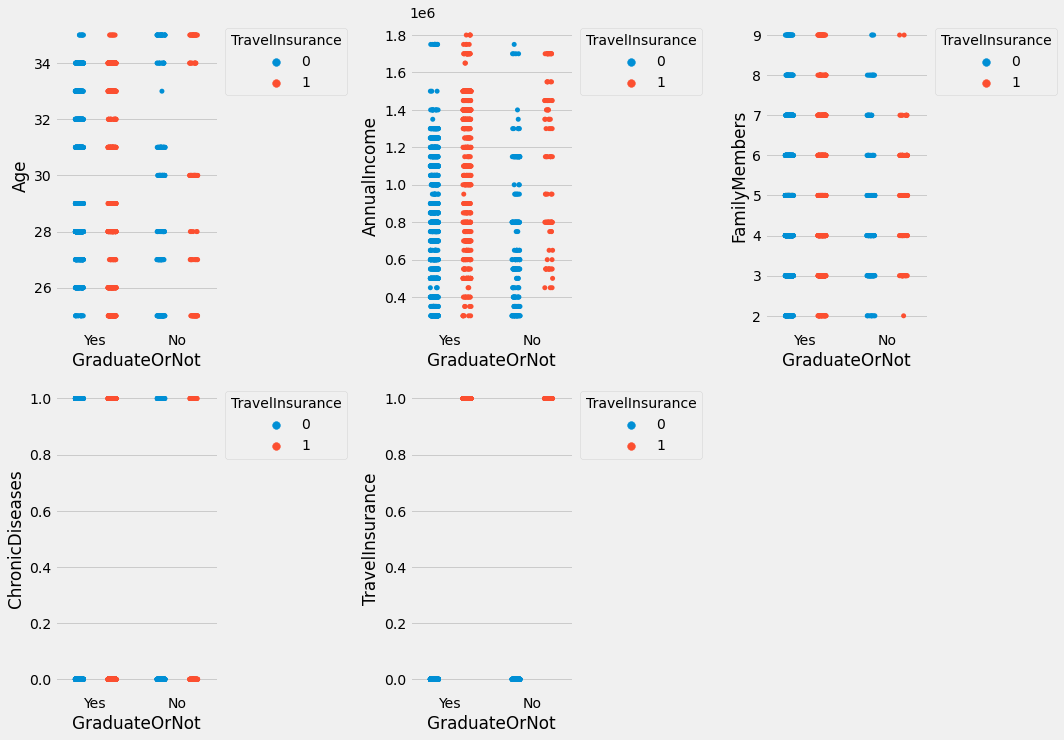

In [38]:
# Distribution of each features vs GraduateOrNot
style.use('fivethirtyeight')
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # For every numerical features
    ax = fig.add_subplot(3, 3, i+1) # Setting the CatPlots' / StripPlots' layout positions
    sns.stripplot(ax=ax, data=df, x='GraduateOrNot', y=nums[i], hue='TravelInsurance', dodge=True) # Draw the CatPlots / StripPLots
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

## **1.4 Business Insight**

Dari segi struktur data:
Penambahan informasi ID pelanggan untuk mempermudah identifikasi pelanggan dan pemeriksaan apakah data yang sama merupakan duplikat atau bukan.

Dari segi analisa data:
Analisis terkait plot persebaran datanya, sehingga dapat lebih memperkuat memprediksi bagaimana model yang akan dibuat. Harapannnya dapat memberikan hasil analisa yang cukup kuat sehingga perusahaan dapat mengalisis data untuk meningkatkan revenue perusahaan.

### Annual Income

<Figure size 576x288 with 0 Axes>

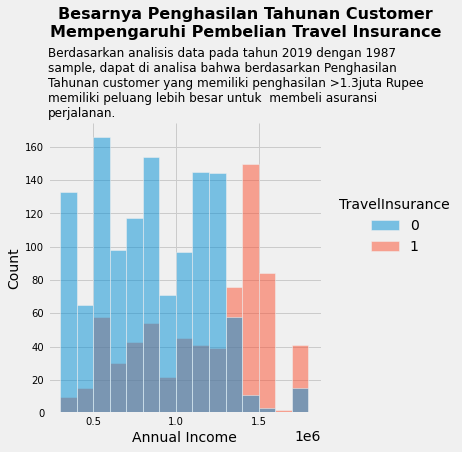

In [39]:
# Business Insight: Annual Income

style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.displot(data=df, x="AnnualIncome",hue="TravelInsurance")
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Besarnya Penghasilan Tahunan Customer Mempengaruhi Pembelian Travel Insurance', 40)), x=0.55, y= 1.28, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Berdasarkan analisis data pada tahun 2019 dengan 1987 sample, dapat di analisa bahwa berdasarkan Penghasilan Tahunan customer yang memiliki penghasilan >1.3juta Rupee memiliki peluang lebih besar untuk  membeli asuransi perjalanan.', 60)), loc='left', y=1, fontsize=12, fontweight='light')
plt.show()

### Employment Type

<Figure size 720x576 with 0 Axes>

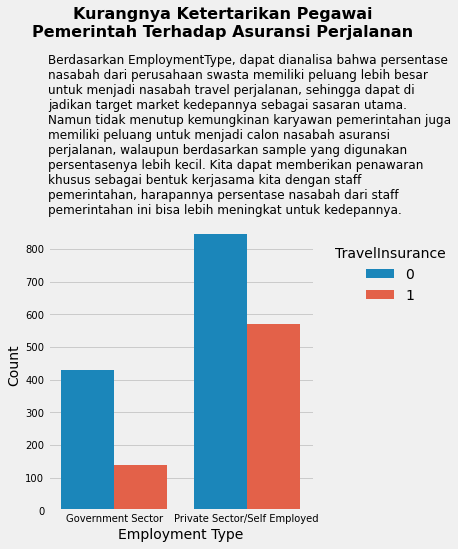

In [40]:
# Business Insight: Employment Type

plt.figure(figsize=(10,8))
sns.catplot(data=df, x="Employment Type",kind='count',hue="TravelInsurance")
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Kurangnya Ketertarikan Pegawai Pemerintah Terhadap Asuransi Perjalanan', 40)), x=0.55, y= 1.55, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Berdasarkan EmploymentType, dapat dianalisa bahwa persentase nasabah dari perusahaan swasta memiliki peluang lebih besar untuk menjadi nasabah travel perjalanan, sehingga dapat di jadikan target market kedepannya sebagai sasaran utama. Namun tidak menutup kemungkinan karyawan pemerintahan juga memiliki peluang untuk menjadi calon nasabah asuransi perjalanan, walaupun berdasarkan sample yang digunakan persentasenya lebih kecil. Kita dapat memberikan penawaran khusus sebagai bentuk kerjasama kita dengan staff pemerintahan, harapannya persentase nasabah dari staff pemerintahan ini bisa lebih meningkat untuk kedepannya.', 60)), loc='left', y=1, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

### Family Members

<Figure size 576x720 with 0 Axes>

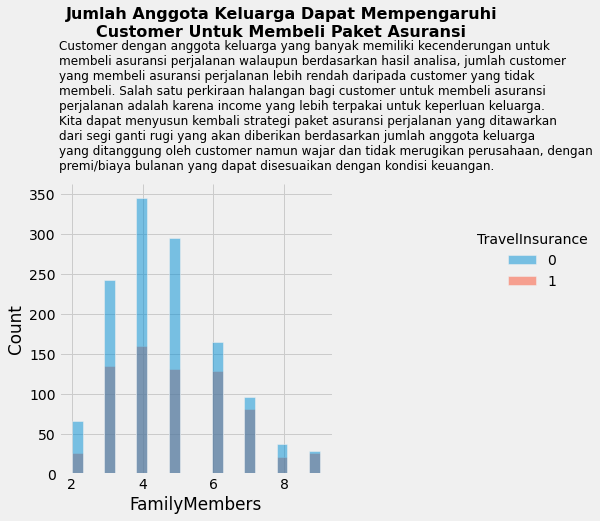

In [41]:
# Business Insight: Family Members

plt.figure(figsize=(8, 10))
sns.displot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.suptitle('\n'.join(wrap('Jumlah Anggota Keluarga Dapat Mempengaruhi Customer Untuk Membeli Paket Asuransi', 50)), x=0.6, y= 1.45, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Customer dengan anggota keluarga yang banyak memiliki kecenderungan untuk membeli asuransi perjalanan walaupun berdasarkan hasil analisa, jumlah customer yang membeli asuransi perjalanan lebih rendah daripada customer yang tidak membeli. Salah satu perkiraan halangan bagi customer untuk membeli asuransi perjalanan adalah karena income yang lebih terpakai untuk keperluan keluarga. Kita dapat menyusun kembali strategi paket asuransi perjalanan yang ditawarkan dari segi ganti rugi yang akan diberikan berdasarkan jumlah anggota keluarga yang ditanggung oleh customer namun wajar dan tidak merugikan perusahaan, dengan premi/biaya bulanan yang dapat disesuaikan dengan kondisi keuangan.', 80)), loc='left', y=1.03, fontsize=12, fontweight='light')
plt.show()

### Frequent Flyer

<Figure size 432x576 with 0 Axes>

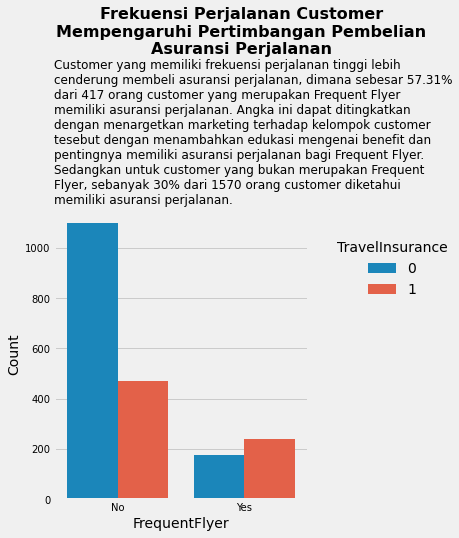

In [42]:
# Business Insight: FrequentFlyer

plt.figure(figsize=(6,8))
sns.catplot(data=df, x="FrequentFlyer",kind='count',hue="TravelInsurance")
plt.xlabel('FrequentFlyer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Frekuensi Perjalanan Customer Mempengaruhi Pertimbangan Pembelian Asuransi Perjalanan', 40)), x=0.6, y= 1.52, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Customer yang memiliki frekuensi perjalanan tinggi lebih cenderung membeli asuransi perjalanan, dimana sebesar 57.31% dari 417 orang customer yang merupakan Frequent Flyer memiliki asuransi perjalanan. Angka ini dapat ditingkatkan dengan menargetkan marketing terhadap kelompok customer tesebut dengan menambahkan edukasi mengenai benefit dan pentingnya memiliki asuransi perjalanan bagi Frequent Flyer. Sedangkan untuk customer yang bukan merupakan Frequent Flyer, sebanyak 30% dari 1570 orang customer diketahui memiliki asuransi perjalanan.', 60)), loc='left', y=1.00, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

### Ever Travelled Abroad

<Figure size 360x216 with 0 Axes>

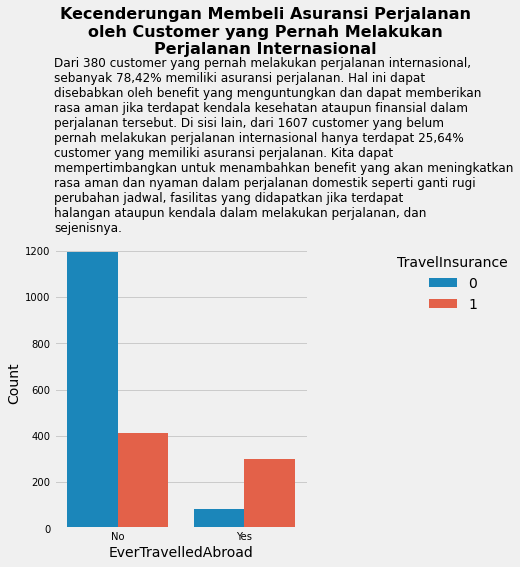

In [43]:
# Business Insight: EverTravelledAbroad

plt.figure(figsize=(5,3))
sns.catplot(data=df, x="EverTravelledAbroad",kind='count',hue="TravelInsurance")
plt.xlabel('EverTravelledAbroad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Kecenderungan Membeli Asuransi Perjalanan oleh Customer yang Pernah Melakukan Perjalanan Internasional', 45)), x=0.65, y= 1.6, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Dari 380 customer yang pernah melakukan perjalanan internasional, sebanyak 78,42% memiliki asuransi perjalanan. Hal ini dapat disebabkan oleh benefit yang menguntungkan dan dapat memberikan rasa aman jika terdapat kendala kesehatan ataupun finansial dalam perjalanan tersebut. Di sisi lain, dari 1607 customer yang belum pernah melakukan perjalanan internasional hanya terdapat 25,64% customer yang memiliki asuransi perjalanan. Kita dapat mempertimbangkan untuk menambahkan benefit yang akan meningkatkan rasa aman dan nyaman dalam perjalanan domestik seperti ganti rugi perubahan jadwal, fasilitas yang didapatkan jika terdapat halangan ataupun kendala dalam melakukan perjalanan, dan sejenisnya.', 65)), loc='left', y=1.00, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

# **2. Data Preprocessing**

## **2.1 Handle Missing Value**

In [44]:
# Checking the null values of numerical features

df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [45]:
# Checkning the null values of categorical features

df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak terdapat missing value pada data digunakan.

## **2.2 Handle Duplicated Data**

In [46]:
# Checking if there are any duplicated rows

df.duplicated().sum()

738

In [47]:
# drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated setelah dihapus {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 738
Jumlah row duplicated setelah dihapus 0


In [48]:
print(f'Jumlah row tanpa data duplikat: {df.shape[0]}')

Jumlah row tanpa data duplikat: 1249


## **2.3 Handle Outliers**

In [49]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 6, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

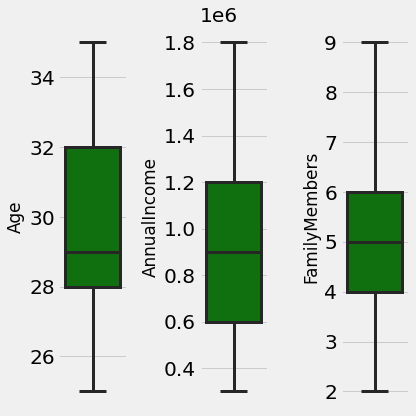

In [50]:
nums = ['Age', 'AnnualIncome', 'FamilyMembers']
for i in range(0, len(nums)):
  plt.subplot(1, len(nums),i+1)
  sns.boxplot(y=df[nums[i]],color="green",orient='v')
  plt.tight_layout()

Berdasarkan BoxPlot di atas, tidak terdapat outliers pada fitur numerikal untuk training model.

In [51]:
# Separating purely numerical features

nums = ['Age', 'AnnualIncome', 'FamilyMembers']
cats = df.drop(nums, axis=1)

In [52]:
# Removing outliers using IQR

for i in nums:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit))
    df = df[filtered_entries]
    print(f'Jumlah baris setelah memfilter outlier feature {i}: {len(df)}')

Jumlah baris setelah memfilter outlier feature Age: 1249
Jumlah baris setelah memfilter outlier feature AnnualIncome: 1249
Jumlah baris setelah memfilter outlier feature FamilyMembers: 1249


**Kesimpulan**:
Tidak terdapat outliers sehingga tidak ada row yang dibuang.

## **2.4 Feature Selection**

Karena jumlah kolom data yang dimiliki dari dataset ini hanya sedikit (9 kolom), maka diputuskan untuk **menggunakan seluruh kolom yang ada sebagai feature untuk pemodelan Machine Learning**.

### Chi Square Test Untuk Korelasi Antar Fitur Kategorikal

In [53]:
# Load Dataset into a new DataFrame

test_df = pd.read_csv("TravelInsurancePrediction.csv")
test_df = test_df.drop(labels='Unnamed: 0', axis=1)

In [54]:
# Mapping ChronicDisease and TravelInsurance columns into Object datatype for Chi-2 Hypotestis Test

map_disease = {
    0: 'No',
    1: 'Yes'
}

map_insurance = {
    0: 'No',
    1: 'Yes'
}

test_df['ChronicDiseases'] = test_df['ChronicDiseases'].map(map_disease)
test_df['TravelInsurance'] = test_df['TravelInsurance'].map(map_insurance)

test_df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No


In [55]:
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [56]:
# Menghapus Duplikat untuk menyamakan jumlah row data

test_df.drop_duplicates(inplace=True)
test_df.shape

(1249, 9)

#### Uji Korelasi Antara Kolom Employment Type dengan Travel Insurance

In [57]:
# Create a contingency table
contingency_table = pd.crosstab(test_df["Employment Type"], test_df["TravelInsurance"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

# Interpret the results
if p < 0.05:
    print("The variables are correlated (reject H0)")
else:
    print("The variables are independent (fail to reject H0)")

Chi-squared test statistic:  6.9346510708008005
p-value:  0.008454155421443737
The variables are correlated (reject H0)


#### Uji Korelasi Antara Kolom GraduateOrNot dengan Travel Insurance

In [58]:
# Create a contingency table
contingency_table = pd.crosstab(test_df["GraduateOrNot"], test_df["TravelInsurance"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

# Interpret the results
if p < 0.05:
    print("The variables are correlated (reject H0)")
else:
    print("The variables are independent (fail to reject H0)")

Chi-squared test statistic:  1.089711243342709
p-value:  0.2965351968551507
The variables are independent (fail to reject H0)


#### Uji Korelasi Antara Kolom ChronicDiseases dengan Travel Insurance

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(test_df["ChronicDiseases"], test_df["TravelInsurance"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

# Interpret the results
if p < 0.05:
    print("The variables are correlated (reject H0)")
else:
    print("The variables are independent (fail to reject H0)")

Chi-squared test statistic:  0.0854420539603025
p-value:  0.7700536442454782
The variables are independent (fail to reject H0)


#### Uji Korelasi Antara Kolom FrequentFlyer dengan Travel Insurance

In [60]:
# Create a contingency table
contingency_table = pd.crosstab(test_df["FrequentFlyer"], test_df["TravelInsurance"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

# Interpret the results
if p < 0.05:
    print("The variables are correlated (reject H0)")
else:
    print("The variables are independent (fail to reject H0)")

Chi-squared test statistic:  19.669203761086663
p-value:  9.20733122419198e-06
The variables are correlated (reject H0)


#### Uji Korelasi Antara Kolom EverTravelledAbroad dengan Travel Insurance

In [61]:
# Create a contingency table
contingency_table = pd.crosstab(test_df["EverTravelledAbroad"], test_df["TravelInsurance"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

# Interpret the results
if p < 0.05:
    print("The variables are correlated (reject H0)")
else:
    print("The variables are independent (fail to reject H0)")

Chi-squared test statistic:  111.77454004049142
p-value:  4.0034414530103906e-26
The variables are correlated (reject H0)


#### Kesimpulan Hasil Pengujian Hipotesa Untuk Melihat Korelasi Antar Data Kategorikal

Berdasarkan hasil pengujian antara kolom-kolom kategorikal dengan target (TravelInsurance), kolom yang memiliki korelasi adalah sebagai berikut:

- EmploymentType & TravelInsurance
- FrequentFlyer & TravelInsurance
- EverTravelledAbroad & TravelInsurance

## **2.5 Feature Extraction**

### 1. Income Group

Merujuk pada artikel dari [The Times in India](https://timesofindia.indiatimes.com/times-special/how-the-middle-class-has-turned-cities-into-indias-growth-engine/articleshow/95865472.cms), diketahui bahwa yang termasuk dengan income kelas menengah di India terdapat pada kisaran 5 lakh - 30 lakh (500,000 Rupees - 3,000,000 Rupees) pada tahun 2020. Dengan jarak hanya 1 tahun dari dataset (tahun 2019), diasumsikan tidak terdapat perbedaan kelas income yang signifikan sehingga informasi dari artikel dapat menjadi pedoman dalam melakukan Feature Extraction.

Karena range income pada dataset hanya berkisar dari 300,000 - 1,800,000, maka pemisahan kelas income untuk Feature Extraction dibagi menjadi:

- Low: Income < 500,000 Rupees
- Medium: Income >500,000 Rupees dan < 1,500,000 Rupees
- High: Income > 1,500,000 Rupees

In [62]:
df['IncomeGroup'] = np.where(df['AnnualIncome'] < 500001, 'Low',
                             np.where(df['AnnualIncome'] < 1500001, 'Medium', 'High'))

In [63]:
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeGroup
0,31,Government Sector,Yes,400000,6,1,No,No,0,Low
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Medium


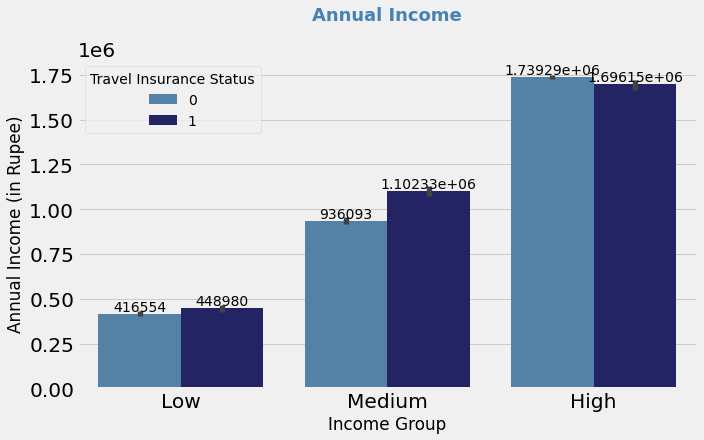

In [64]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x="IncomeGroup", y= "AnnualIncome", hue="TravelInsurance"
            , palette=["#4682b4", "#191970"])
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Annual Income",
         color="#4682b4",fontsize=18,fontweight='bold', x=0.5,y=1.1)
plt.xlabel("Income Group")
plt.ylabel("Annual Income (in Rupee)")
plt.legend(title="Travel Insurance Status")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## **2.6 Feature Tambahan**

- Identitas Customer: Agar dapat membedakan mana yang merupakan data duplikat atau bukan.
- Memiliki Asuransi Jiwa/Kesehatan: Apakah customer memiliki asuransi lainnya. Karena benefit dari asuransi perjalanan adalah mengcover semua biaya yang terjadi hanya pada suatu perjalanan sehingga ada kemungkinan customer yang telah memiliki asuransi lainnya tidak akan tertarik untuk membeli asuransi perjalanan.
- Responded: Menginformasikan apakah pihak Travel Insurance sudah pernah melakukan marketing terhadap customer sebelumnya (baik via telepon atau email) dan apakah customer memberikan respon atau tidak.
- Frequency: Frekuensi berkunjung customer ke web travel
- PromotionType: Kolom yang menginformasikan jenis promosi terhadap customer, dimana: 1. untuk orang yang sudah pernah berlangganan, 2. untuk orang yg belum pernah berlangganan. Promosi yang ditampilkan akan berbeda pada halaman akun pelanggan, 3. untuk orang yang sudah pernah ditawari secara langsung oleh pihak Travel Insurance namun belum tertarik untuk menjadi customer yang di nilai sangat berpotensi menjadi nasabah Travel Insurance.

## **2.7 Feature Transformation**

In [65]:
# Checking the data skewness

for i in range(0, len(nums)):
  skew = df[nums[i]].skew(axis = 0, skipna = True)
  print(f'{nums[i]}: {skew}')

Age: 0.1766593709859495
AnnualIncome: 0.1455499784860763
FamilyMembers: 0.44079226295946317


In [66]:
# Checking the numerical features' descriptive statistics

df[nums].describe()

,Age,AnnualIncome,FamilyMembers
count,1249.000000,1.249000e+03,1249.000000
mean,29.755805,9.345476e+05,4.890312
std,2.921039,3.607293e+05,1.762313
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.200000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


Fitur-fitur numerikal yang dimiliki bersifat normal, dengan pembuktian:

- Berdasarkan skewness dari fitur-fitur numerikal lebih kecil dari 1, dapat diketahui bahwa distribusi data bersifat normal.
- Perbedaan antara nilai mean dan median dari fitur-fitur numerikal tidak signifikan, sehingga dapat diasumsikan bahwa distribusi data bersifat normal.

Karena fitur-fitur numerikal bersifat normal, untuk penyeragaman values setiap feature dilakukan normalisasi.

In [67]:
# Normalization to rescale the numerical features into similar numerical ranges

df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['AnnualIncome_norm'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
df['FamilyMembers_norm'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeGroup,Age_norm,AnnualIncome_norm,FamilyMembers_norm
0,31,Government Sector,Yes,400000,6,1,No,No,0,Low,0.6,0.066667,0.571429
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Medium,0.6,0.633333,0.714286


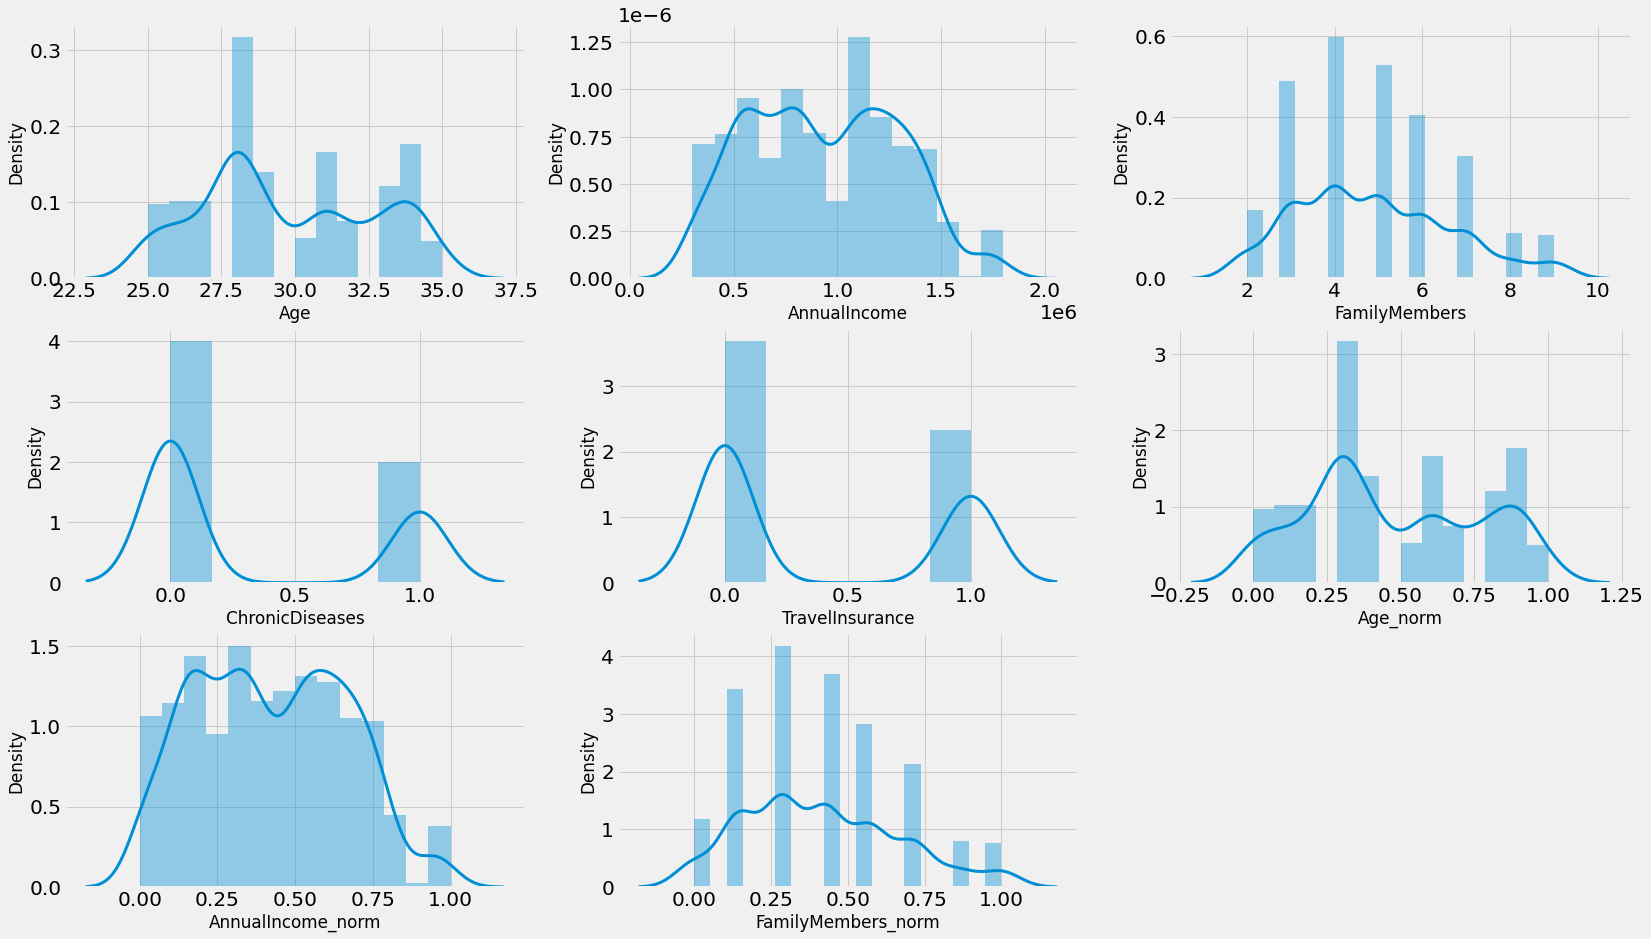

In [68]:
# Distribution Plots after normalizations

plt.figure(figsize=(25,20))
for i in enumerate(df.describe().columns):
  plt.subplot(4,3,i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

## **2.8 Feature Encoding**

In [69]:
# Checking the values before feature encoding

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1047
No      202
Name: GraduateOrNot, dtype: int64

Value count kolom ChronicDiseases:
0    833
1    416
Name: ChronicDiseases, dtype: int64

Value count kolom FrequentFlyer:
No     954
Yes    295
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1005
Yes     244
Name: EverTravelledAbroad, dtype: int64

Value count kolom TravelInsurance:
0    766
1    483
Name: TravelInsurance, dtype: int64



In [70]:
# Label Encoding of Categorical Columns: Employment Type, GraduateOrNot, FrequentFlyer, EverTravelledAbroad
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ['Employment Type','GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

for cats in columns:
    df[cats] = le.fit_transform(df[cats])

In [71]:
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeGroup,Age_norm,AnnualIncome_norm,FamilyMembers_norm
0,31,0,1,400000,6,1,0,0,0,Low,0.6,0.066667,0.571429
1,31,1,1,1250000,7,0,0,0,0,Medium,0.6,0.633333,0.714286


In [72]:
# One Hot Encoding Categorical Columns: Income Group
onehots = pd.get_dummies(df['IncomeGroup'], prefix='IncomeClass')
df = df.join(onehots)

In [73]:
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeGroup,Age_norm,AnnualIncome_norm,FamilyMembers_norm,IncomeClass_High,IncomeClass_Low,IncomeClass_Medium
0,31,0,1,400000,6,1,0,0,0,Low,0.6,0.066667,0.571429,0,1,0
1,31,1,1,1250000,7,0,0,0,0,Medium,0.6,0.633333,0.714286,0,0,1


In [74]:
# Checking the values after Feature Encoding

for col in columns:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
1    876
0    373
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
1    1047
0     202
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
0    954
1    295
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
0    1005
1     244
Name: EverTravelledAbroad, dtype: int64



## **2.9 Reviewing Correlation Heatmap**

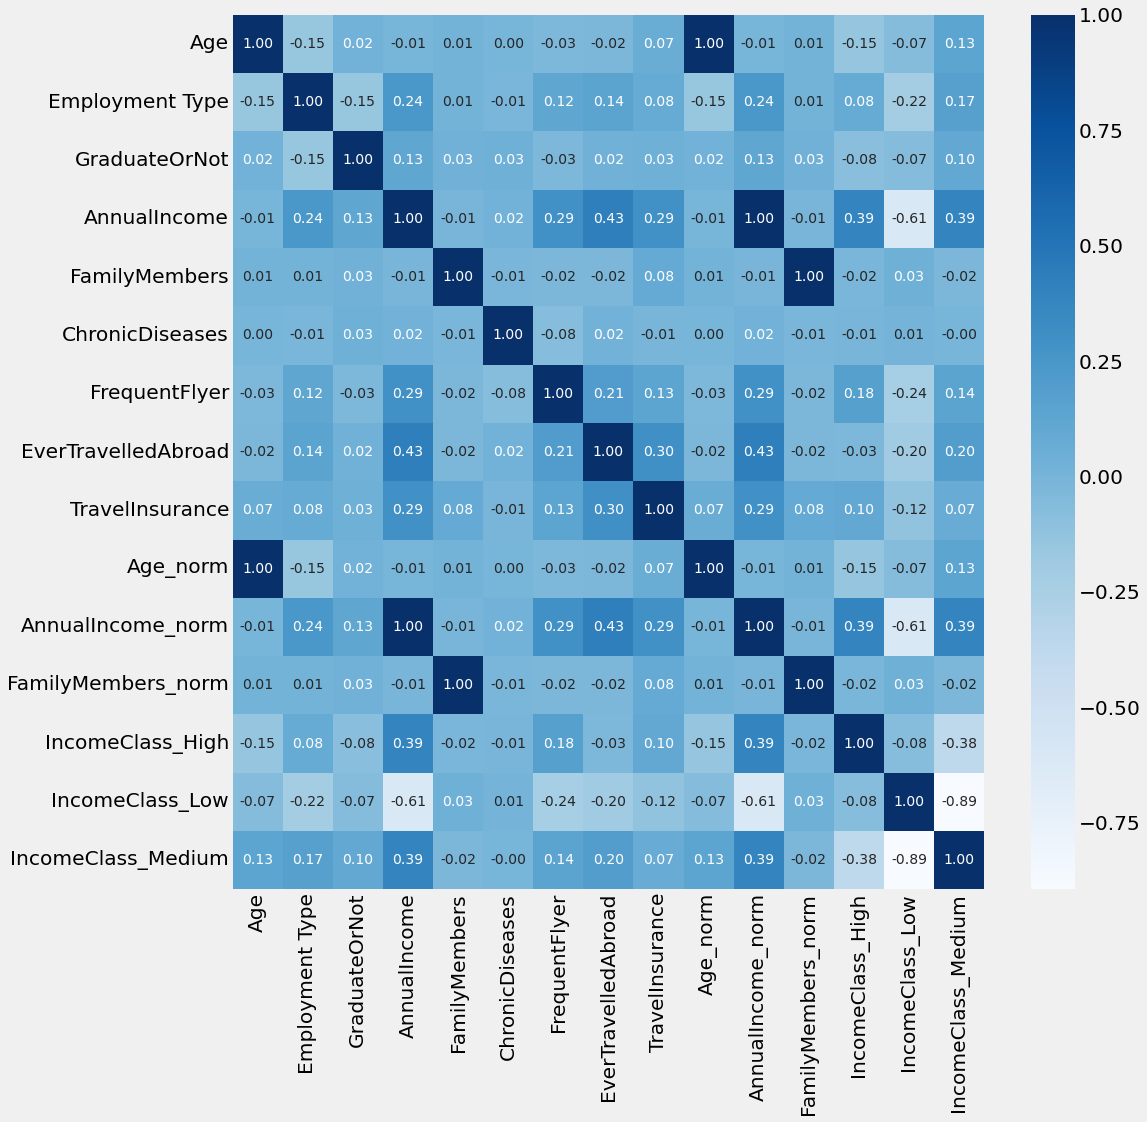

In [75]:
plt.figure(figsize=(15, 15)) # Checking the correlation using heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## **2.10 Data Splitting**

In [76]:
# Setting the Features and Target

X = df.drop(['Age', 'AnnualIncome', 'FamilyMembers', 'TravelInsurance', 'IncomeGroup'], axis=1)
y = df['TravelInsurance']

# Melihat ukuran fitur dan target
print(f'Shape of Features: {X.shape}')
print(f'Shape of Target: {y.shape}')

Shape of Features: (1249, 11)
Shape of Target: (1249,)


In [77]:
# Splitting the dataset into Train and Test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of train: ','\n','X_train',X_train.shape,'y_train',y_train.shape)
print('Shape of test: ','\n','X_test',X_test.shape,'y_test',y_test.shape)

Shape of train:  
 X_train (999, 11) y_train (999,)
Shape of test:  
 X_test (250, 11) y_test (250,)


## **2.11 Class Imbalance**

In [78]:
# Checking the class imbalance
target0 = X_train[y==0]
target1 = X_train[y==1]

print(f'target0 shape: {target0.shape} \nPercentage: {round(target0.shape[0] / (target0.shape[0]+target1.shape[0])*100, 2)}%')
print(f'target1 shape: {target1.shape} \nPercentage: {round(target1.shape[0] / (target0.shape[0]+target1.shape[0])*100, 2)}%')

target0 shape: (616, 11) 
Percentage: 61.66%
target1 shape: (383, 11) 
Percentage: 38.34%


Class Imbalance pada Target tidak signifikan, sehingga tidak perlu melakukan handling .

### No Imbalance

- X_train: Fitur Train tanpa perlakuan handling Class Imbalance
- X_test: Fitur Test tanpa perlakuan handling Class Imbalance
- y_train: Target Train tanpa perlakuan handling Class Imbalance
- y_test: Target Test tanpa perlakuan handling Class Imbalance

# **3. Supervised Learning**

## **3.1 Declaring Functions**

In [79]:
# Declaring Functions

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## **3.2 Model Fitting**

Algoritma Klasifikasi yang digunakan:
- Logistic Regression
- k-Nearest Neighbor
- Decision Tree
- Random Forest
- AdaBoost
- XGBoost

In [80]:
# Modelling for Selected Algorithms

# Selected Models
models = ['Logistic Regression', 'k-Nearest Neighbor', 'Decision Tree', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGB Classifier']
algorithms = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, XGBClassifier]

# List of results:
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [81]:
# Evaluating All Models Using Unhandled CLass Imbalance Data
i = 0
random_seed = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]

for model_type in algorithms:
    # Fitting and using the algorithms
    if model_type in random_seed:
        model = model_type(random_state=10)
    model = model_type()
    model.fit(X_train, y_train)
    print(models[i])
    result = eval_classification(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
k-Nearest Neighbor
Decision Tree
Random Forest Classifier
AdaBoost Classifier
XGB Classifier


### **Fitting Result: No Imbalance**

In [82]:
# Turning the results into Dataframe for easier analysis

result_df = pd.DataFrame(list(zip(models, acc_test_ni, precision_test_ni, recall_test_ni, f1_test_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Algorithms', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

In [83]:
result_df

,Algorithms,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.708,0.764706,0.39,0.516556,0.704484,0.669867,0.6991,0.6876
1,k-Nearest Neighbor,0.684,0.632911,0.50,0.558659,0.832057,0.651567,0.8330,0.6561
2,Decision Tree,0.624,0.534091,0.47,0.500000,0.982450,0.577433,0.9807,0.5717
3,Random Forest Classifier,0.636,0.554217,0.46,0.502732,0.982391,0.626633,0.9805,0.6257
4,AdaBoost Classifier,0.748,0.862745,0.44,0.582781,0.760026,0.718867,0.7587,0.7282
5,XGB Classifier,0.676,0.623377,0.48,0.542373,0.964178,0.684533,0.9627,0.6971


Setelah pengujian 6 algoritma klasifikasi diputuskan untuk melanjutkan penggunaan Algoritma **Logistic Regression**, **AdaBoost** dan **XGBoost** karena merupakan algoritma dengan performa terbaik diantara algoritma lainnya.

## **3.3 Hyperparameter Tuning**

### **3.3.1 Hyperparameter Tuning - Logistic Regression**

<b>Hyperparameter yang biasa di tuning pada Logistic Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- C: nilai regularization
- penalty: menggukanan l2 norm (ridge), l1 (lasso), atau elastic net
- solver: metode bagaimana kita melakukan update pada variable di logistic regression (slope/intercept): liblinear bagus jika data sedikit; sag & saga bagus jika data besar (karena menggunakan metode sampling)

In [84]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2', 'elasticnet']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
solver = ['liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

{'Test Accuracy': 0.684,
 'Test Precision': 0.723404255319149,
 'Test Recall': 0.34,
 'Test F1': 0.4625850340136055,
 'Train ROC AUC': 0.6954770099352344,
 'Test ROC AUC': 0.6594666666666666,
 'Crossval Train ROC AUC': 0.6892,
 'Crossval Test ROC AUC': 0.6801}

In [85]:
show_best_hyperparameter(rs)

{'C': 0.0494959595959596, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Learning Curve - Logistic Regression

In [86]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.6711645078159438; test: 0.6382666666666666
param value: 0.05564444444444445; train: 0.6966426197823063; test: 0.6613333333333333
param value: 0.11118888888888889; train: 0.7013686378895256; test: 0.6669333333333333
param value: 0.16673333333333332; train: 0.7029072428876607; test: 0.6677333333333333
param value: 0.22227777777777777; train: 0.7033226238513445; test: 0.6684666666666667
param value: 0.2778222222222222; train: 0.7039668882031807; test: 0.6686000000000001
param value: 0.33336666666666664; train: 0.7040940456410429; test: 0.6683999999999999
param value: 0.3889111111111111; train: 0.7041533857787121; test: 0.6688
param value: 0.44445555555555555; train: 0.7043017361228849; test: 0.6686
param value: 0.5; train: 0.7043992234919128; test: 0.6686666666666666


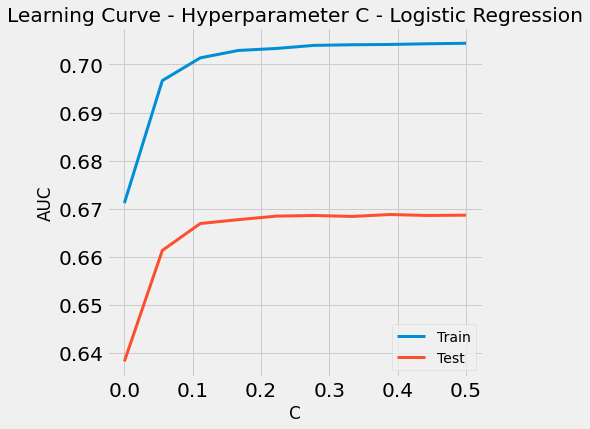

In [87]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.5, 10)]
draw_learning_curve(param_values)

### **3.3.2 Hyperparameter Tuning - AdaBoost**

<b>Hyperparameter yang biasa di tuning pada Adaboost:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html'>Dokumentasi Sklearn Adaboost</a>)
- base_estimator: algoritma dasar yang digunakan pada boosting, untuk adaboost defaultnya adalah Decision Tree
- n_estimators: jumlah iterasi pada boosting
- learning_rate: learning rate untuk memperbaiki dari new-model ke old-model pada iterasi selanjutnya. angka yang direkomendasikan < 0.1
    - ada tradeoff antara learning rate dan n_estimators. semakin kecil learning_rate, diharap n_estimators semakin besar agar dapat menemukan error yang minimum dengan baik
- algorithm: algoritma yang digunakan untuk update weight. SAMME.R memungkinkan untuk mendapatkan hasil yang lebih cepat dengan iterasi yang lebih sedikit

In [88]:
# List of hyperparameter

hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

{'Test Accuracy': 0.744,
 'Test Precision': 0.86,
 'Test Recall': 0.43,
 'Test F1': 0.5733333333333333,
 'Train ROC AUC': 0.7594626326675934,
 'Test ROC AUC': 0.7112999999999999,
 'Crossval Train ROC AUC': 0.7578,
 'Crossval Test ROC AUC': 0.7247}

#### Learning Curve - AdaBoost

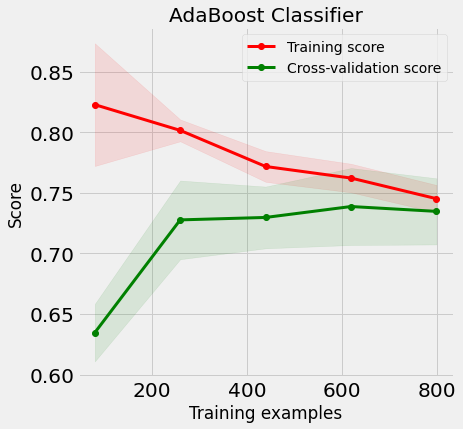

In [89]:
# learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ab_tuned.best_estimator_, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("AdaBoost Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


### **3.3 Hyperparameter Tuning - XGBoost**

<b>Hyperparameter yang umum di tuning pada XGBoost:</b> (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>Dokumentasi XGBoost</a>)
- <b>Terkait arsitektur tree</b>:
    - max_depth: maksimal kedalaman tree untuk mencegah overfitting
    - min_child_weight: minimum weight (atau jumlah sample; jika total weightnya=1) yang dimiliki oleh node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
    - gamma: minimum loss/error reduction yang diatur untuk membuat sebuah leaf baru
    - tree_method: bagaimana metode xgboost untuk membangun sebuah treenya. algoritma yang kita pelajari tree_method = exact. Referensi lain dapat dilihat <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>disini</a>.

- <b>Terkait subsampling pada proses boosting</b>. Daripada menggunakan keseluruhan data train setiap iterasinya, kita dapat menggunakan sample pada setiap iterasinya/
    - subsample: berapa banyak baris sample yang digunakan untuk sampling di setiap stepnya. 1 untuk semua baris.
    - colsample_bytree: berapa banyak faeture yang digunakan. 1 untuk semua feature

- <b>Terkait control learning rate</b>:
    - eta: step size untuk update weight feature pada xgboost, range value: 0-1. semakin kecil eta, semakin detail perbaikannya, namun butuh lebih banyak iterasi dari boosting. 
        - di sklearn, nama hyperparameternya adalah learning_rate.
    
- <b>Regularization pada XGBoost</b>:
    - lambda: koefisien regularisasi pada L2 norm
    - alpha: koefisien regularisasi pada L1 norm

- <b>Terkait learning task XGBoost</b>:
    - objective: fungsi objective yang digunakan, seperti menghitung error pada regression
    - eval_metric: metrics evaluasi yang akan digunakan pada data validation (i.e. rmse, mae, auc)
    - seed: random state

- <b>Lainnya</b>:
    - scale_pos_weight: jika data imbalance, parameter ini digunakan untuk mengatur bobot dari masing-masing label.
    
- <b>Parameter lain yang untuk pengecekan dan debug model</b>:
    - verbose: untuk menampilkan detail log dari training model. 0: tidak menampilkan pesan apapun; 1: menampilkan jika ada warning saja; 2: menampilkan info (akan deprecated, contohnya); 3: debug: detail training dari model

In [90]:
# Turning the hyperparameters into a dictionary

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

{'Test Accuracy': 0.768,
 'Test Precision': 0.8888888888888888,
 'Test Recall': 0.48,
 'Test F1': 0.6233766233766234,
 'Train ROC AUC': 0.7809458817944458,
 'Test ROC AUC': 0.7192333333333334,
 'Crossval Train ROC AUC': 0.8841,
 'Crossval Test ROC AUC': 0.7233}

In [91]:
show_best_hyperparameter(xg_tuned)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.4, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 80, 'max_leaves': None, 'min_child_weight': 14, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'approx', 'validate_parameters': None, 'verbosity': None, 'lambda': 0.0, 'eta': 0.42424242424242425, 'alpha': 1.0}


#### Learning Curve - XGBoost

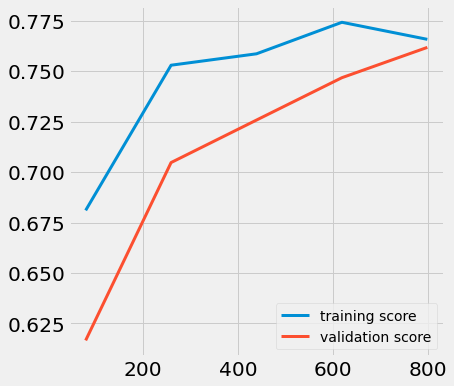

In [92]:
# Creating Learning Curve
train_sizes, train_scores, validation_scores = learning_curve(xg_tuned.best_estimator_, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_sizes, np.mean(validation_scores, axis=1), label='validation score')
plt.legend(loc='best')
plt.show()

# **4. Evaluation**

## **4.1 Confusion Matrix**

In [93]:
def eval_classification_matrix(model): #Renew to generate Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test,
        'y_pred': y_pred,
        'y_pred_train': y_pred_train, # Added this line of code to generate y_pred_train
    }
    return eval_result

### Confusion Matrix: Train Data

In [94]:
result = eval_classification_matrix(xg_tuned)

In [95]:
y_pred_train = result['y_pred_train']

Confusion Matrix: Train 
 [[580  36]
 [196 187]]


Text(0.5, 3.7399999999999807, 'Prediction')

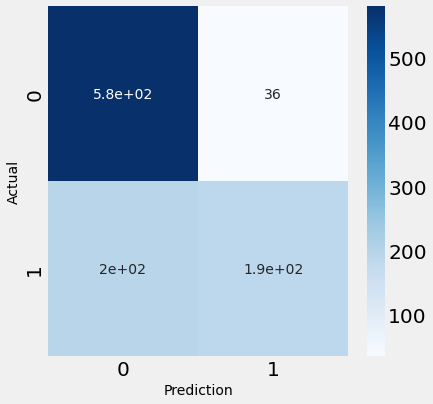

In [96]:
# Visualization : Confusion Matrix on Train Data
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix: Train \n {}'.format(cm_train))

## visualisasi
style.use('fivethirtyeight')
sns.heatmap(cm_train, annot=True, cmap="Blues")
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Prediction', fontsize = 14)

In [97]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       616
           1       0.84      0.49      0.62       383

    accuracy                           0.77       999
   macro avg       0.79      0.71      0.73       999
weighted avg       0.78      0.77      0.75       999



In [98]:
# Calculating the Train ROC AUC Score

roc_auc_traincm = round(roc_auc_score(y_train, y_pred_train)*100, 4)
print('Train ROC AUC: ', roc_auc_traincm, '%')

Train ROC AUC:  71.4905 %


### Confusion Matrix: Test Data

In [99]:
y_pred = result['y_pred']

Confusion Matrix: Test 
 [[144   6]
 [ 52  48]]


Text(0.5, 3.7399999999999807, 'Prediction')

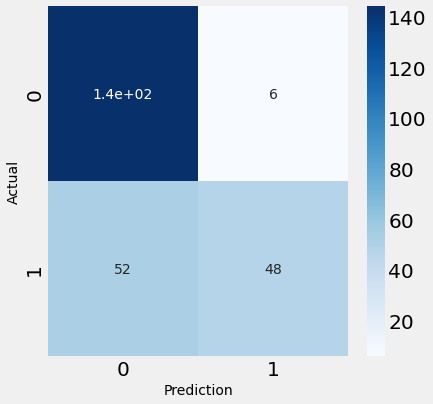

In [100]:
# Visualization :Confusion Matrix on Test Data

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: Test \n {}'.format(cm_test))

## visualisasi
style.use('fivethirtyeight')
sns.heatmap(cm_test, annot=True, cmap="Blues")
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Prediction', fontsize = 14)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       150
           1       0.89      0.48      0.62       100

    accuracy                           0.77       250
   macro avg       0.81      0.72      0.73       250
weighted avg       0.80      0.77      0.75       250



In [102]:
# Calculating the Test ROC AUC Score

roc_auc_testcm = round(roc_auc_score(y_test, y_pred)*100, 4)

print('Test ROC AUC: ', roc_auc_testcm, '%')

Test ROC AUC:  72.0 %


## **4.2 Feature Importance**

Text(0.5, 1.0, 'Feature Importance Plot')

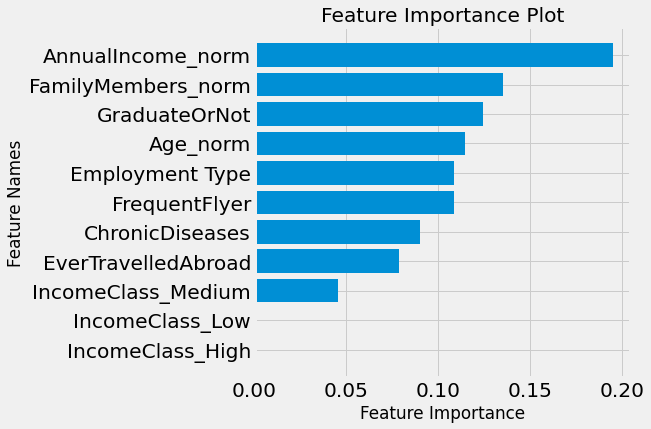

In [103]:
style.use('fivethirtyeight')

# Membuat model XGBoost
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

# Detecting Feature Importances and sorting the best features descending
importance = xg.feature_importances_
sorted_idx = np.argsort(importance)

# Plot Feature Importance
plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance Plot")

### **Business Insight**

Berdasarkan Grafik Feature Importance di atas, Business Insight yang dapat disimpulkan adalah:
- Penghasilan Tahunan (AnnualIncome_norm) merupakan faktor terpenting bagi customer dalam pengambilan keputusan untuk membeli asuransi perjalanan. Hal ini wajar karena customer dengan penghasilan yang rendah akan sulit menyisihkan penghasilannya untuk melakukan perjalanan, ataupun membeli asuransi perjalanan. Prioritas penggunaan penghasilan customer akan lebih mendahulukan kebutuhan primer.
- Jumlah Anggota Keluarga (FamilyMembers_norm) merupakan faktor terpenting kedua setelah faktor Penghasilan Tahunan. Hal ini cukup wajar karena sebanding dengan Penghasilan Tahunan, Jika jumlah anggota keluarga yang merupakan tanggungan dari customer ada banyak, maka prioritas penggunaan penghasilan customer tentunya adalah untuk anggota keluarga terlebih dahulu.
- Lulusan Pendidikan Tinggi atau Tidak (GraduateOrNot): Faktor berikutnya yang mempengaruhi keputusan customer dalam membeli asuransi perjalanan adalah status pendidikan customer, dimana kita dapat mengetahui apakah customer merupakan lulusan pendidikan tinggi atau bukan. Customer yang merupakan lulusan pendidikan tinggi diperkirakan mampu memahami resiko yang ada setiap kali melakukan perjalanan, dan memiliki penghasilan yang lebih besar, sehingga dapat mempengaruhi kepurusan customer dalam pengambilan keputusan untuk membeli asuransi perjalanan.
- FrequentFlyer: Faktor ini menginformasikan apakah customer merupakan seseorang yang sering melakukan perjalanan. Seorang Frequent Flyer akan memiliki resiko membutuhkan asuransi perjalanan yang lebih tinggi dibandingkan dengan customer yang jarang melakukan perjalanan, sehingga dapat disimpulkan bahwa status Frequent Flyer akan mempengaruhi pengambilan keputusan customer untuk membeli asuransi perjalanan.

### **Action Items**

- Annual Income: **Income Based Discount** <br>
    Membuat event discount (sale) untuk customer berdasarkan informasi income group. Contoh:
  - Income Group High: 5%
  - Income Group Medium: 10%
  - Income Group Low: 15%
- Family Members: **Referral Program (Family & Friends)** <br>
    Membuat program referral dimana customer yang telah bergabung dapat menikmati keuntungan tambahan (10% dari harga package yang diamnbil oleh customer baru untuk Referred Customer, dan 5% dari harga package yang diambil oleh customer baru untuk customer baru itu sendiri).
- Frequent Flyer: **Loyalty Club** <br>
    Membuat program **Loyalty Club** dimana customer yang telah bergabung akan dapat menukarkan point-point yang telah didapatkan dari transaksi-transaksi sebelumnya untuk mendapatkan keuntungan-keuntungan yang ditawarkan.
- Marketing Strategy: **Anchoring Effect** <br>
    Sebuah teknik marketing yang menggunakan prinsip '**Mental Anchoring**' untuk mempengaruhi persepsi customer mengenai harga sebuah produk atau jasa. Perusahaan akan menetapkan harga tinggi awal dari sebuah produk atau jasa, kemudian menawarkan diskon yang besar untuk menarik customer agar membeli produk kita.

**Thank You**